# Project: How people's quality of life has evolved

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Investigation of the Gapminder World dataset and **analysis of the evolution of people’s quality of life from the 90s to 2015 through the indicators of Human Development, Gross National Income per capita and female labor participation**.
>
>The **Human Development Index (HDI)** indicator is an index used to rank countries by level of human development. It contains three dimensions: health level, educational level and living standard.
>
>The **Gross National Income (GNI)** per capita indicator is in US dollars and is converted using the World Bank Atlas method. Is the gross national income divided by mid-year population.
>
>The **Labour force participation rate (%) for females** aged 15-64 indicator is the percentage of female labour to total female population.
>
>
> With these indicators, we will explore how HDI has evolved over time and whether there has been a decrease in human development in some countries.
We will analyze if there is a correlation between the Human Development Index and the Gross National Income per capita. In this way, it will be possible to see if the national income is invested in health, education and other human development outcomes.
>
>As for the GNI per capita, we wonder how it differs between continents and countries belonging to the same continent. If there is a difference in income between countries on the same continent, is there also a difference in human development between them? Do the continents have great economic inequalities?
>
>Finally, we want to know if there is a greater female workforce as a result of greater human development and if the female workforce is a global fact.

In [1]:
# We import statements for all of the packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

### General Properties

In [2]:
# We load data and we inspect it.
hdi = pd.read_csv('hdi_human_development_index.csv')
continent_list = pd.read_csv('countries_list.csv')
hdi = continent_list.merge(hdi, left_on='country', right_on='country', how='inner')
hdi.to_csv('continents_hdi.csv', index=False)
gni = pd.read_csv('gnipercapita_atlasmethod_current_us.csv')
fem = pd.read_csv('females_aged_15_64_labour_force_participation_rate_percent.csv')

# Human Development Index (HDI) data
hdi.head(3)

,country,Continent,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AS,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,EU,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,AF,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ad64910>,
      dtype=object)

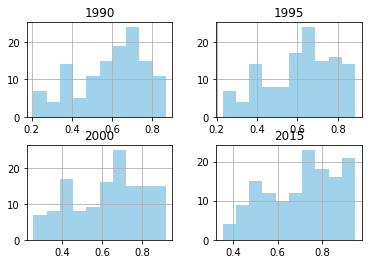

In [3]:
# HDI Histograms,
# Identifying outliers.
hdi.hist(['1990','1995','2000','2015'], color=['#89C7E7'], alpha=.8)

With these visualizations we can observe that, over the years, the Human Development indices that occur the most in the countries are between 0.6 and 0.8. In the 90s, the indices between 0.3 and 0.5 are the least common among countries. In the 2000s we see how the indices of more than 0.7 have occurred in many more countries since the beginning of this decade. There is also a rise in the lowest HDI in the countries in these 25 years, although they are still the biggest outliers.

In [4]:
# Gross national income, GNI, per capita, in current US$
gni.head(3)

,country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.0,460.0,500.0,560.0,670.0,680.0,650.0,600.0,580.0,570.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3950.0,4230.0,4360.0,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4320.0
2,Algeria,190.0,230.0,240.0,240.0,230.0,250.0,280.0,310.0,330.0,...,4200.0,4270.0,4460.0,4580.0,5140.0,5480.0,5470.0,4830.0,4360.0,3960.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b629a50>,
      dtype=object)

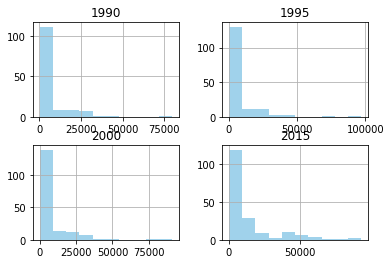

In [5]:
# GNI per capita Histograms,
# Identifying outliers.
gni.hist(['1990','1995','2000','2015'], color=['#89C7E7'], alpha=.8)

These graphs show a clear trend in the GNI per capita of the countries: a clear inequality of national income. Most have incomes of up to $ 25,000, while the most striking outliers are between 75,000 and 100,000 US dollars.

In [6]:
# Percentage of female labour to total female population. Aged 15-64. 
fem.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Afghanistan,15.3,15.4,15.4,15.4,15.4,15.5,15.3,15.2,15.1,...,20.5,20.5,20.6,20.6,20.6,20.7,20.7,20.7,20.7,20.8
1,Albania,58.0,60.1,60.4,59.8,59.2,58.3,57.8,58.5,58.0,...,56.5,56.9,57.3,57.7,58.0,58.3,58.5,58.6,58.7,58.8
2,Algeria,12.3,12.3,12.3,12.4,12.5,12.6,12.6,12.6,12.6,...,17.0,17.0,16.9,16.8,16.7,16.6,16.5,16.4,16.4,16.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b7cc6d0>,
      dtype=object)

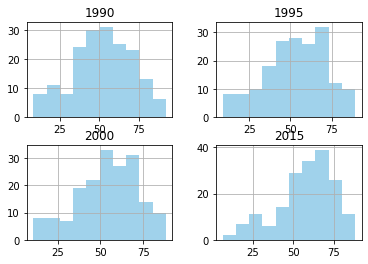

In [7]:
# Percentage of female labour Histograms,
# Identifying outliers.
fem.hist(['1990','1995','2000','2015'], color=['#89C7E7'], alpha=.8)

The most repeated percentages of working women are located over the years in the same range, from 50 to 70%. We see the most significant outliers in 2015, where there are very few countries with less than 25% working women.

In [8]:
# List of countries and continents
continent_list.head(3)

,country,Continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF


In [9]:
# For countries that are part of more than one continent, e.g. Armenia it is part of EU and Asia,
#  we duplicate their information in two rows for each continent.
#  We create a new dataframe with these new rows, transcont, for the first question of 
#  exploratory data analysis.
transcont = pd.read_csv('continents_hdi.csv')
trans = transcont[transcont['Continent'].str.contains('/')]
transcont1 = trans.copy()
transcont2 = trans.copy()
split_column = ['Continent']
for c in split_column:
    transcont1[c] = transcont1[c].apply(lambda x: x.split(" / ")[0])
    transcont2[c] = transcont2[c].apply(lambda x: x.split(" / ")[1])
new_rows = transcont1.append(transcont2)
transcont.drop(trans.index, inplace=True)
transcont = transcont.append(new_rows, ignore_index= True)
transcont[transcont['Continent'].str.contains(' / ')]

,country,Continent,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


<a id='eda'></a>
## Exploratory Data Analysis


### How the Human Development Index indicator has evolved through the years in each continent


In [10]:
# Group countries by continent and get the mean for each year in a new dataframe
hdi_by_continent = transcont.groupby('Continent')['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'].mean()
hdi_by_continent

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent,,,,,,,,,,,,,,,,,,,,,
A,0.624458,0.628542,0.633125,0.637917,0.642958,0.648167,0.654167,0.660167,0.665958,0.670875,...,0.704792,0.711292,0.716917,0.718917,0.723917,0.728583,0.731708,0.736292,0.740625,0.742458
AF,0.420455,0.422212,0.422909,0.425000,0.426667,0.430394,0.433606,0.437212,0.440212,0.438371,...,0.469537,0.478561,0.487000,0.494732,0.501756,0.508732,0.516439,0.521854,0.526244,0.529244
AS,0.584143,0.587200,0.590200,0.595057,0.599714,0.606083,0.612722,0.618639,0.623944,0.629694,...,0.677256,0.685128,0.690718,0.694462,0.701410,0.707462,0.712564,0.715205,0.718282,0.719487
EU,0.738944,0.738972,0.738250,0.742139,0.747167,0.746368,0.751500,0.757289,0.764632,0.770158,...,0.808220,0.814390,0.818854,0.819732,0.824610,0.829220,0.832195,0.836634,0.839927,0.841659
OC,0.842000,0.843500,0.848000,0.855000,0.860500,0.868000,0.871500,0.875500,0.878500,0.880500,...,0.904500,0.907500,0.910000,0.913000,0.914000,0.917000,0.920500,0.923000,0.925000,0.927000


In [11]:
# Transpose this dataframe to create a line graph.
hdi_by_continent = hdi_by_continent.transpose()

In [12]:
# Small analysis of HD indices by continent.
hdi_by_continent.describe()

Continent,A,AF,AS,EU,OC
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.686338,0.462655,0.652674,0.788371,0.890154
std,0.037547,0.036454,0.045946,0.036060,0.026258
min,0.624458,0.420455,0.584143,0.738250,0.842000
25%,0.655667,0.434508,0.614201,0.752947,0.872500
50%,0.686667,0.448500,0.649605,0.790474,0.894500
75%,0.718417,0.492799,0.693526,0.819512,0.912250
max,0.742458,0.529244,0.719487,0.841659,0.927000


The continent with the highest data is Oceania, with an average HDI of 0.89.
In Africa, 75% of countries have a Human Development Index of 0.4928 or less.
They are followed by Asia with a 0.6935 and America with a 0.7184.

In [13]:
# Mean HDI by continent, in order.
hdi_by_continent.mean().nsmallest()

Continent
AF    0.462655
AS    0.652674
A     0.686338
EU    0.788371
OC    0.890154
dtype: float64

Text(0, 0.5, 'Human Development Index (from 0 to 1)')

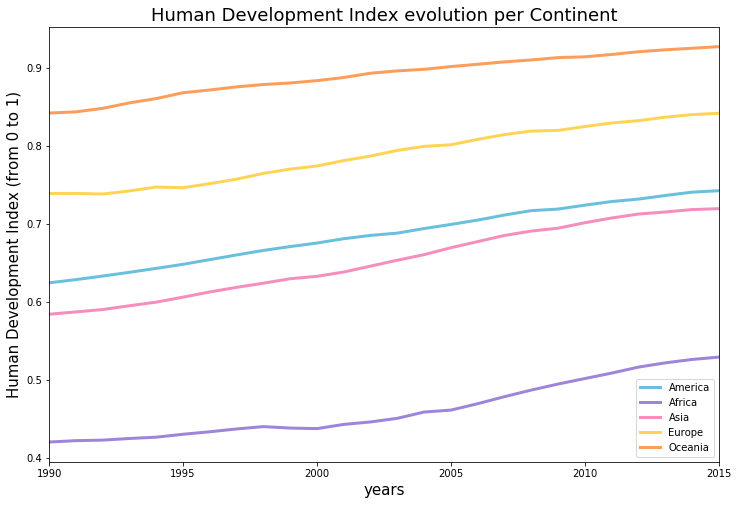

In [14]:
# This graph shows the HDI evolution per continent from 1990 to 2015
hdi_continent_evolution = pd.DataFrame(hdi_by_continent, index=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
colors = ['#2BA4CF','#7451C9','#F25DA2','#FFC30C','#FC7417']
ax = hdi_continent_evolution.plot.line(figsize=(12,8), linewidth=3, color=colors, alpha=.7)
ax.legend(['America', 'Africa','Asia','Europe','Oceania'])
plt.title('Human Development Index evolution per Continent', fontsize=18)
plt.xlabel('years', fontsize=15)
plt.ylabel('Human Development Index (from 0 to 1)', fontsize=15)

The Human Development Index has grown over the years in all the continents.
Oceania, followed by Europe, is the best indicator of health, education and living standard levels. 
Africa has the lowest Human Development Index, with an average of 0.4627.

#### What is the difference in the Human Development Index between the 1990s and the new century between countries? Are there countries that have decreased their HDI?

In [15]:
# We create two new columns with the averages of the 90s and the averages of the new century.
col = hdi.loc[:, '1990':'1999']
hdi['90s'] = col.mean(axis=1)

col = hdi.loc[:, '2000':'2015']
hdi['00s'] = col.mean(axis=1)

In [16]:
# Here we see that there are null values in many countries for HDI.
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 30 columns):
country      140 non-null object
Continent    140 non-null object
1990         125 non-null float64
1991         125 non-null float64
1992         125 non-null float64
1993         125 non-null float64
1994         125 non-null float64
1995         127 non-null float64
1996         127 non-null float64
1997         127 non-null float64
1998         127 non-null float64
1999         129 non-null float64
2000         135 non-null float64
2001         135 non-null float64
2002         135 non-null float64
2003         135 non-null float64
2004         135 non-null float64
2005         140 non-null float64
2006         140 non-null float64
2007         140 non-null float64
2008         140 non-null float64
2009         140 non-null float64
2010         140 non-null float64
2011         140 non-null float64
2012         140 non-null float64
2013         140 non-null float64
2014         

In [17]:
# How many null values are there for the time intervals we want to compare.
hdi.loc[:,['90s','00s']].isnull().sum()

90s    11
00s     0
dtype: int64

In [18]:
# Check which countries won't be analyzed for those time intervals.
hdi_null_countries = hdi[hdi['90s'].isnull() == True]
hdi_null_countries

,country,Continent,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,90s,00s
15,Bosnia and Herzegovina,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.716,0.717,0.711,0.728,0.735,0.742,0.747,0.750,NaN,0.723273
19,Burkina Faso,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.356,0.365,0.377,0.384,0.392,0.398,0.399,0.402,NaN,0.370636
24,Chad,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.343,0.360,0.370,0.381,0.387,0.390,0.394,0.396,NaN,0.341375
40,Equatorial Guinea,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.590,0.589,0.580,0.583,0.586,0.582,0.582,0.592,NaN,0.573188
41,Eritrea,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.404,0.405,0.410,0.414,0.416,0.418,0.420,NaN,0.409545
43,Ethiopia,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393,0.401,0.411,0.422,0.427,0.435,0.441,0.448,NaN,0.374125
48,Georgia,AS / EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734,0.738,0.742,0.749,0.755,0.759,0.768,0.769,NaN,0.726000
72,Lebanon,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.746,0.752,0.758,0.763,0.766,0.763,0.763,0.763,NaN,0.752545
76,Madagascar,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500,0.503,0.504,0.506,0.508,0.509,0.511,0.512,NaN,0.488688
94,North Macedonia,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.730,0.732,0.735,0.739,0.741,0.743,0.746,0.748,NaN,0.730909


En este momento hay que hacer una limpieza de datos para poder comparar el incremento entre los intervalos de tiempo de los años 90 y los años 2000.
11 países no tienen valores en la década de los 90. Por tanto, hay que eliminar dichos 11 países.
Con esto podremos comparar de forma correcta 129 países.
La mayoría de países descartados son Africanos.
Vamos a crear un nuevo dataframe con las variables de HDI de la década de los años 90 y de los años 2000.

At this point, you have to do a data cleaning to be able to compare the increase between the time intervals of the 90s and the 2000s.
11 countries have no values in the 1990s. Therefore, these 11 countries must be eliminated.
Now, we can correctly compare 129 countries.
Most of the discarded countries are from Africa.

In [19]:
# We create a new dataframe, hdi_timeslots, with the time intervals that we want to analyze.
# We eliminate countries without values and compare countries with data.
hdi_timeslots = hdi.loc[:,['country','Continent','90s','00s']]
hdi_timeslots.dropna(inplace=True)
hdi_timeslots.isnull().sum().any

<bound method Series.any of country      0
Continent    0
90s          0
00s          0
dtype: int64>

In [20]:
# Now we are going to compare the HDI increment between these time intervals for 129 countries.
hdi_timeslots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 139
Data columns (total 4 columns):
country      129 non-null object
Continent    129 non-null object
90s          129 non-null float64
00s          129 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


In [21]:
# We create the HDI increment between these time intervals.
hdi_timeslots['00s-90s'] = hdi_timeslots['00s'] - hdi_timeslots['90s']
hdi_timeslots['00s-90s']

# Next, the countries that have decreased in HDI in this new century. 
hdi_timeslots[hdi_timeslots['00s-90s'] < 0]

,country,Continent,90s,00s,00s-90s
73,Lesotho,AF,0.4782,0.460062,-0.018138
114,South Africa,AF,0.6412,0.631000,-0.010200
118,Swaziland,AF,0.5396,0.517250,-0.022350
139,Zimbabwe,AF,0.4692,0.444250,-0.024950


In [22]:
# The country that has increased its HDI the most.
hdi_timeslots[hdi_timeslots['00s-90s'] == hdi_timeslots['00s-90s'].max()]

,country,Continent,90s,00s,00s-90s
106,Rwanda,AF,0.2459,0.428938,0.183038


In [23]:
# We calculate the average of the increase or decrease between the 90s and the new century.
hdi_timeslots['00s-90s'].mean()

0.0698483527131783

Between the 1990s and the new century, there has been an increase in the HD index of 0.0698 in all countries.

But Africa has a peculiarity. On this continent we have the only countries where the index has decreased and the country with the maximum increase in the index.

The countries with the decrease in index are Lesotho, South Africa, Swaziland and Zimbabwe.
Rwanda is the country with the highest HDI increase, 0.1830.

### Do countries with higher Gross National Income (GNI) per capita have higher Human Development Index?

The GNI per capita only reflects the national average income. It does not disclose any information on how that income is invested, or whether it serves to improve health, education, and other human development outcomes. 

For this reason we are going to see if there is a positive correlation between them. This could indicate that such income could be invested in human development.

In [24]:
# We are going to select 2015 data from GNI and HDI.
# We will rename columns.
gni_2015 = gni.loc[:, ['country','2015']]
gni_2015.rename(columns={'2015': 'gni_2015'}, inplace=True)
hdi.rename(columns={'2015': 'hdi_2015'}, inplace=True)

In [25]:
# Check if we have null values.
gni_2015['gni_2015'].isnull().sum(), hdi['hdi_2015'].isnull().sum()

(6, 0)

In [26]:
# We will merge gni_2015 and hdi_2015.
# We will drop the null values from the new dataframe.
gni_hdi_2015 = hdi.loc[:, ['country','Continent','hdi_2015']].merge(gni_2015, left_on='country', right_on='country', how='inner')
gni_hdi_2015.dropna(inplace=True)
gni_hdi_2015.isnull().sum().any()

False

In [27]:
# GNI and HDI dataframe in 2015.
gni_hdi_2015.head(3)

,country,Continent,hdi_2015,gni_2015
0,Afghanistan,AS,0.479,600.0
1,Albania,EU,0.764,4390.0
2,Algeria,AF,0.745,4830.0


In [28]:
# We are going to create categories for HDI.
# These bins will be used to "cut" the HDI data into categories.
bin_edges = [0.3,0.5,0.7,0.9,1.0]

bin_names = ['low index','medium index','high index','max. index']


# Now we create the HDI categories column.
gni_hdi_2015['hdi_cat'] = pd.cut(gni_hdi_2015['hdi_2015'], bin_edges, labels=bin_names)

gni_hdi_2015.head(3)

,country,Continent,hdi_2015,gni_2015,hdi_cat
0,Afghanistan,AS,0.479,600.0,low index
1,Albania,EU,0.764,4390.0,high index
2,Algeria,AF,0.745,4830.0,high index


In [29]:
# We check for null values.
gni_hdi_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 139
Data columns (total 5 columns):
country      136 non-null object
Continent    136 non-null object
hdi_2015     136 non-null float64
gni_2015     136 non-null float64
hdi_cat      136 non-null category
dtypes: category(1), float64(2), object(2)
memory usage: 5.6+ KB


In [30]:
# Here we can see what happens to HDI and GNI per capita worldwide in 2015. 
gni_hdi_2015.describe()

,hdi_2015,gni_2015
count,136.000000,136.000000
mean,0.705515,14115.441176
std,0.159496,19193.539649
min,0.353000,280.000000
25%,0.575000,1485.000000
50%,0.741000,5330.000000
75%,0.840750,17775.000000
max,0.949000,93100.000000


Here we can see what happens globally in 2015 in the HDI and GNI indicators per capita:
The HDI average is 0.7 and the GNI per capita average is $ 14115.44.

25% of the countries have an HDI equal to or less than 0.5750 and a GNI per capita equal to or less than $ 1485.

50% of countries have an HDI equal to or less than 0.7410 and a GNI per capita equal to or less than $ 5330.

75% of the countries have an HDI equal to or less than 0.8408 and a GNI per capita equal to or less than $ 17775.

The maximum HDI is 0.9490 and the maximum GNI per capita is $ 93,100.

In [31]:
# Group by the HDI categories created and get the mean for GNI per capita.
gni_hdi_means = gni_hdi_2015.groupby('hdi_cat').gni_2015.mean()
gni_hdi_means

hdi_cat
low index         707.272727
medium index     2808.421053
high index      16152.786885
max. index      54140.000000
Name: gni_2015, dtype: float64

Text(0, 0.5, 'Average GNI per capita')

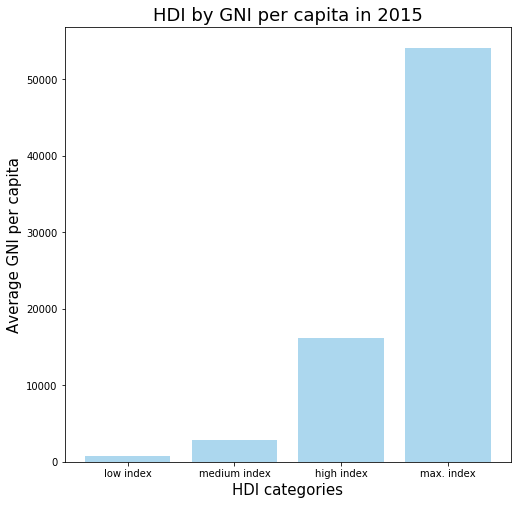

In [32]:
# 'HDI by GNI per capita in 2015' Bar chart
locations = [1,2,3,4]
heights = gni_hdi_means
labels = gni_hdi_means.index
colors = ['#89C7E7']
plt.figure(figsize=(8,8))
plt.bar(locations, heights, tick_label=labels, color=colors, alpha=.7)
plt.title('HDI by GNI per capita in 2015', fontsize=18)
plt.xlabel('HDI categories', fontsize=15)
plt.ylabel('Average GNI per capita', fontsize=15)

There is a positive correlation between HDI and GNI per capita. As the HD index of the countries increases, the GNI per capita also increases in the year 2015.


#### What is the GNI per capita by continent? Is there a difference in GNI between countries on the same continent? If so, how much difference is there from HDI?

In [33]:
# For countries that are part of more than one continent, e.g. Armenia it is part of EU and Asia,
#  we duplicate their information in two rows for each continent.
#  We create a new dataframe with these new rows, transcont, for the first question of 
#  exploratory data analysis.
gni_hdi_2015.to_csv('gni_hdi_2015.csv', index=False)
transcont = pd.read_csv('gni_hdi_2015.csv')
trans = transcont[transcont['Continent'].str.contains('/')]
transcont1 = trans.copy()
transcont2 = trans.copy()
split_column = ['Continent']
for c in split_column:
    transcont1[c] = transcont1[c].apply(lambda x: x.split(" / ")[0])
    transcont2[c] = transcont2[c].apply(lambda x: x.split(" / ")[1])
new_rows = transcont1.append(transcont2)
transcont.drop(trans.index, inplace=True)
transcont = transcont.append(new_rows, ignore_index= True)
transcont[transcont['Continent'].str.contains(' / ')]

,country,Continent,hdi_2015,gni_2015,hdi_cat


In [34]:
# The mean GNI per capita by continent in 2015.
gni_cont_means = transcont.groupby('Continent').gni_2015.mean()
gni_cont_means.nsmallest()

Continent
AF     2344.000000
A     11675.000000
AS    13292.105263
EU    25350.975610
OC    50350.000000
Name: gni_2015, dtype: float64

The average GNI per capita by continent places Africa with the lowest amount and Europe with the highest amount.
We are struck by the fact that Asia has a GNI per capita half greater than America.

Let's see how much difference there is between countries with more and less GNI per capita per continent.

In [35]:
# GNI per capita in Africa and Max. GNI per capita in Africa.
gni_AF = transcont.query('Continent == "AF"')
gni_AF[gni_AF['gni_2015'] == gni_AF['gni_2015'].max()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
36,Equatorial Guinea,AF,0.592,10800.0,medium index


In [36]:
# Min GNI per capita in Africa.
gni_AF[gni_AF['gni_2015'] == gni_AF['gni_2015'].min()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
18,Burundi,AF,0.404,280.0,low index


In [37]:
# GNI per capita in Europe and Max. GNI per capita in Europe.
gni_EU = transcont.query('Continent == "EU"')
gni_EU[gni_EU['gni_2015'] == gni_EU['gni_2015'].max()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
88,Norway,EU,0.949,93100.0,max. index


In [38]:
# Min GNI per capita in Europe.
gni_EU[gni_EU['gni_2015'] == gni_EU['gni_2015'].min()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
76,Moldova,EU,0.699,2230.0,medium index


In [39]:
# GNI per capita in America and Max. GNI per capita in America.
gni_A = transcont.query('Continent == "A"')
gni_A[gni_A['gni_2015'] == gni_A['gni_2015'].max()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
123,United States,A,0.92,56300.0,max. index


In [40]:
# Min GNI per capita in America.
gni_A[gni_A['gni_2015'] == gni_A['gni_2015'].min()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
48,Haiti,A,0.493,810.0,low index


In [41]:
# GNI per capita in Asia and Max. GNI per capita in Asia.
gni_AS = transcont.query('Continent == "AS"')
gni_AS[gni_AS['gni_2015'] == gni_AS['gni_2015'].max()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
96,Qatar,AS,0.856,75700.0,high index


In [42]:
# Min GNI per capita in Asia.
gni_AS[gni_AS['gni_2015'] == gni_AS['gni_2015'].min()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
0,Afghanistan,AS,0.479,600.0,low index


In [43]:
# GNI per capita in Oeania and Max. GNI per capita in Oceania.
gni_OC = transcont.query('Continent == "OC"')
gni_OC[gni_OC['gni_2015'] == gni_OC['gni_2015'].max()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
5,Australia,OC,0.939,60400.0,max. index


In [44]:
# Min GNI per capita in Oceania.
gni_OC[gni_OC['gni_2015'] == gni_OC['gni_2015'].min()]

,country,Continent,hdi_2015,gni_2015,hdi_cat
84,New Zealand,OC,0.915,40300.0,max. index


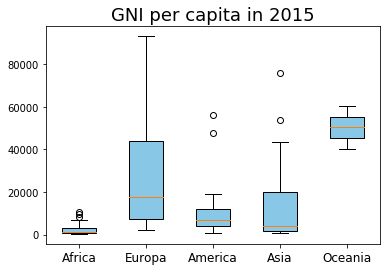

In [45]:
# 'GNI per capita in 2015 by continent' Box Plot.
box = plt.boxplot([gni_AF['gni_2015'], gni_EU['gni_2015'], gni_A['gni_2015'], gni_AS['gni_2015'], gni_OC['gni_2015']], patch_artist=True)
plt.xticks([1,2,3,4,5], ['Africa','Europa','America','Asia','Oceania'], fontsize=12)
colors = ['#89C7E7','#89C7E7','#89C7E7','#89C7E7','#89C7E7']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('GNI per capita in 2015', fontsize=18)
plt.show()

If we segment by continent, there are large differences in GNI between countries belonging to the same continent in 2015.
However, we only observe large differences in the HD index between countries on the same continent in America and Asia.

With this we can conclude that in Europe, Africa and Oceania there may be great differences in GNI, but living, health and education standards do not differ too much from each other.
Meanwhile, Asia and America have many inequalities of GNI and standards of living, health and education.

### Do countries with higher Human Development Index have higher Female labour force participation rate (%)?

In [46]:
# We are selecting the Female labour force participation rate columns and the HDI columns of 2015.
fem_2015 = fem.loc[:, ['country','2015']]
hdi_2015 = hdi.loc[:, ['country','Continent','hdi_2015']]
fem_2015.rename(columns={'2015': 'fem_2015'}, inplace=True)

In [47]:
# Next, we see how there are no null values.
fem_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
country     179 non-null object
fem_2015    179 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [48]:
# We merge data in a new dataframe with the Female labour participation and the HDI in 2015.
fem_hdi_2015 = hdi_2015.merge(fem_2015, left_on='country', right_on='country', how='inner')
fem_hdi_2015.head(3)

,country,Continent,hdi_2015,fem_2015
0,Afghanistan,AS,0.479,19.5
1,Albania,EU,0.764,55.7
2,Algeria,AF,0.745,16.6


In [49]:
# Female labour participation in 2015 information.
fem['2015'].describe()

count    179.000000
mean      57.559218
std       17.292512
min        6.400000
25%       50.350000
50%       60.100000
75%       69.500000
max       88.000000
Name: 2015, dtype: float64

In 2015, the female labor force reached an average of 57% worldwide.

50% of countries have 60.10% or less working women.

75% of countries have 69.5% or less working women.

The country with the most working women has 88%.

In [50]:
# Country with the higher HDI is Norway and has a Female labour participation of 76%.
fem_hdi_2015[fem_hdi_2015['hdi_2015'] == fem_hdi_2015['hdi_2015'].max()]

,country,Continent,hdi_2015,fem_2015
95,Norway,EU,0.949,76.0


In [51]:
#While Rwanda has the max. Female labour participation percentage and has a low HDI.
fem_hdi_2015[fem_hdi_2015['fem_2015'] == fem_hdi_2015['fem_2015'].max()]

,country,Continent,hdi_2015,fem_2015
106,Rwanda,AF,0.498,88.0


Norway, with a max. HDI, has only 12% more working women than Rwanda. In Rwanda, 88% of women work.

In [52]:
# We check there are no null values.
fem_hdi_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 4 columns):
country      140 non-null object
Continent    140 non-null object
hdi_2015     140 non-null float64
fem_2015     140 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.5+ KB


In [53]:
# We are going to create categories for Female labour.
# These bins will be used to "cut" the Females labour data into categories.
bin_edges = [0,10,20,30,40,50,60,70,80,90]
bin_names = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
# Now we create the Females labour categories column.
fem_hdi_2015['fem_categories_2015'] = pd.cut(fem_hdi_2015['fem_2015'], bin_edges, labels=bin_names)

fem_hdi_2015.head(3)

,country,Continent,hdi_2015,fem_2015,fem_categories_2015
0,Afghanistan,AS,0.479,19.5,10-20
1,Albania,EU,0.764,55.7,50-60
2,Algeria,AF,0.745,16.6,10-20


In [54]:
# We group by Female labour categories and get the HDI mean in 2015.
fem_hdi_means = fem_hdi_2015.groupby('fem_categories_2015').hdi_2015.mean()
fem_hdi_means

fem_categories_2015
0-10     0.482000
10-20    0.655200
20-30    0.681625
30-40    0.656250
40-50    0.668000
50-60    0.706947
60-70    0.732750
70-80    0.756931
80-90    0.508750
Name: hdi_2015, dtype: float64

Text(0, 0.5, 'Average HDI')

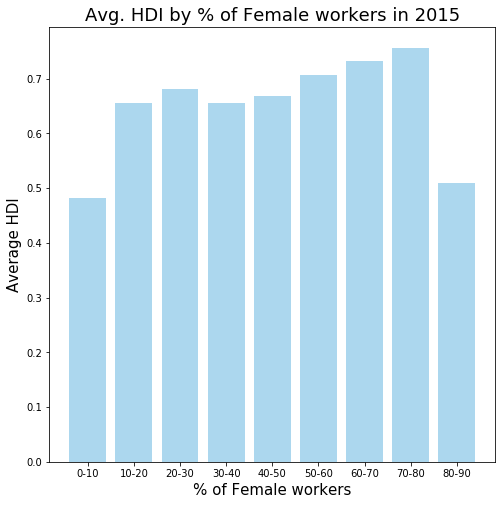

In [55]:
# Avg. HDI by Females workers in 2015 Bar Chart
locations = [1,2,3,4,5,6,7,8,9]
heights = fem_hdi_means
labels = fem_hdi_means.index
plt.figure(figsize=(8,8))
plt.bar(locations, heights, tick_label=labels, color=colors, alpha=.7)
plt.title('Avg. HDI by % of Female workers in 2015', fontsize=18)
plt.xlabel('% of Female workers', fontsize=15)
plt.ylabel('Average HDI', fontsize=15)

As we can see, there is no correlation between Human Development and the percentage of Working Women.
However, the second highest percentage of Working Women does coincide with the highest figure for Human Development.

#### Which continent has more Female labour force participation rate?

In [56]:
# For countries that are part of more than one continent, e.g. Armenia it is part of EU and Asia,
#  we duplicate their information in two rows for each continent.
#  We create a new dataframe with these new rows, transcont, for the first question of 
#  exploratory data analysis.
transcont = fem_hdi_2015[fem_hdi_2015['Continent'].str.contains('/')]
fem1 = transcont.copy()
fem2 = transcont.copy()
split_column = ['Continent']
for c in split_column:
    fem1[c] = fem1[c].apply(lambda x: x.split(" / ")[0])
    fem2[c] = fem2[c].apply(lambda x: x.split(" / ")[1])
new_rows = fem1.append(fem2)
fem_hdi_2015.drop(transcont.index, inplace=True)
fem_hdi_2015 = fem_hdi_2015.append(new_rows, ignore_index= True)
fem_hdi_2015[fem_hdi_2015['Continent'].str.contains(' / ')]

,country,Continent,hdi_2015,fem_2015,fem_categories_2015


Text(0, 0.5, 'Percentage of Female Workers')

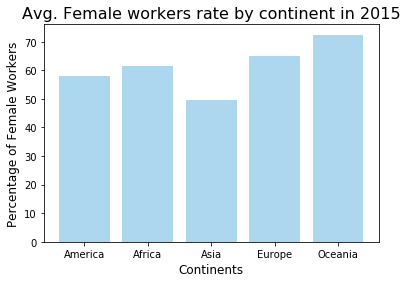

In [57]:
# Avg. Females labour rate by continent in 2015
fem_by_continent = fem_hdi_2015.groupby('Continent')['fem_2015'].mean()
plt.bar([1,2,3,4,5],fem_by_continent, color=colors, alpha=.7, tick_label=['America','Africa','Asia','Europe','Oceania'])
plt.title('Avg. Female workers rate by continent in 2015', fontsize=16)
plt.xlabel('Continents', fontsize=12)
plt.ylabel('Percentage of Female Workers', fontsize=12)

In [58]:
# Female workers rate statistics.
fem_by_continent.describe()

count     5.000000
mean     61.248068
std       8.522232
min      49.476923
25%      57.850000
50%      61.353659
75%      65.109756
max      72.450000
Name: fem_2015, dtype: float64

In [59]:
# Avg. Female workers rate by continent in 2015 data.
fem_by_continent

Continent
A     57.850000
AF    61.353659
AS    49.476923
EU    65.109756
OC    72.450000
Name: fem_2015, dtype: float64

Africa, America and Europe have a similar Female workers' rate in 2015. 
Asia has the lowest percentage of working women while Oceania has the highest.

<a id='conclusions'></a>
## Conclusions

> There have been many null values in all indicators, especially in the 90s and earlier. For this reason, we have decided to focus our analysis from the 1990s to 2015. 
We have analyzed our indicators by continents, rather than by countries, to avoid the restrictions of the countries with null values. 
There are officially 194 countries in the world. For each of our indicators we have had less than 194 samples.
>
>In the evolution of HDI by continent, we initially had 140 samples. Despite having null values, we use all this data to create a mean grouped by continents.
>
>**The Human Development Index has grown over the years in all the continents**. 
Oceania is the best indicator with a mean of 0.8902, followed by Europe, while Africa is the lowest one, with a mean of 0.4627. Africa is the only continent where the Human Development Index has decreased between the 90s and 2015. But, on the other hand, it has also the country with the highest increase, Rwanda.
In Africa 75% of the countries have just an index of 0.4928 or less.
>
>To calculate the increase in HDI between the time intervals of the 1990s and the new century we have to reduce the sample again. Many African countries do not have data in the 1990s.
This affects the result. For example, Africa cannot be evaluated correctly because the data obtained is extremely extreme: countries with the largest index declines or one country with the highest global index increases.

>The second indicator, GNI per capita, only has six countries with no data in 2015. Thus, it will be easier to relate the HDI indicator to it.
>
>There is a **positive correlation between HDI and Gross National Income (GNI) per capita** so, that income is invested to improve health, education, and other human development outcomes. 
Globally we have an average HDI of 0.7 and a GNI average of 14,115.44 US dollars in 2015.
>
>Below we see how this positive correlation also occurs between quartiles:
25% of the countries have an HDI equal to or less than 0.5750 and a GNI per capita equal to or less than 1485 US dollars.
50% of countries have an HDI equal to or less than 0.7410 and a GNI per capita equal to or less than 5330 US dollars.
>
>If we segment the average GNI per capita by continent, Europe has the highest GNI, 25350 US dollars, and Africa has the lowest, 11675 US dollars. 
Asia, with 13292 US dollars, has a GNI half greater than America. If we segment GNI by continent there are large differences between countries belonging to the same continent in 2015, that is, we have outlier countries.
Asia and America have countries with high inequalities of GNI and Human Development. However, Europe, Africa and Oceania have big differences in GNI but their respective countries do not differ too much in Human Development.

> The last indicator is the one with the most samples, 179 (in 2015). Therefore, we can describe much more accurate statistics.
The female workforce average is 57% globally and 75% of countries have 69.5% or less working women.
>
>By relating the Female Labor Force to the Human Development index, our sample is again affected, having to be decreased by the smaller number of HDI data.
This relationship shows **no correlation between female workers and HDI**. However, the second highest percentage of Working Women does coincide with the highest figure for Human Development.
>
>To finish, the average of working women by continent, with 61.2481%, is very similar to the global figure, 57%. There is a similarity of percentages where only Oceania and Asia stand out. Oceania with the highest Female Labour rate and Asia with the lowest.